In [1]:
import pylhe
import ROOT
import math
import os
import pandas as pd
import uproot
import numpy as np
import matplotlib.pyplot as plt


Welcome to JupyROOT 6.20/04


In [2]:
sg_file = uproot.open("/data/event/sg_ppwax100/Events/run_01/tag_1_delphes_events.root") 
bg_file = uproot.open("/data/event/bg_sm100/Events/run_01/tag_1_delphes_events.root")

In [3]:
def file_np(file):
    event = [ file["Delphes;1"]["Electron"].array(),
              file["Delphes;1"]["Electron.PT"].array(),
              file["Delphes;1"]["Electron.Eta"].array(),
              file["Delphes;1"]["Electron.Phi"].array(),
              file["Delphes;1"]["Muon"].array(),                #4
              file["Delphes;1"]["Muon.PT"].array(),
              file["Delphes;1"]["Muon.Eta"].array(),
              file["Delphes;1"]["Muon.Phi"].array(),
              file["Delphes;1"]["Photon"].array(),              #8
              file["Delphes;1"]["Photon.PT"].array(),
              file["Delphes;1"]["Photon.Eta"].array(),
              file["Delphes;1"]["Photon.Phi"].array(),
              file["Delphes;1"]["MissingET"].array(),           #12
              file["Delphes;1"]["MissingET.fUniqueID"].array(),   
              file["Delphes;1"]["MissingET.fBits"].array(),
              file["Delphes;1"]["MissingET.MET"].array(),
              file["Delphes;1"]["MissingET.Eta"].array(),
              file["Delphes;1"]["MissingET.Phi"].array(),
              file["Delphes;1"]["Jet"].array(),                 #18
              file["Delphes;1"]["Jet.EhadOverEem"].array(),     
              file["Delphes;1"]["Jet.Mass"].array(),
              file["Delphes;1"]["Event.Number"].array(),
              file["Delphes;1"]["Jet.Tau[5]"].array()
              ]
    
    event = np.expand_dims(event, axis=-1)    ### reshape data
    event = event.transpose((1,0,2))
    event = np.squeeze(event,axis=(2,))
    return event 
    

In [4]:
bg_events = file_np(bg_file)
sg_events = file_np(sg_file)

In [5]:
me = 0.000511

################################################
def prlen(events):
    print(len(events))

################################################  sel
def num_sl(event,lab,num):
    where1 = np.where(event[:,lab]==num)
    return event[where1]

def l_sl(event):
    where1 = np.where(event[:,0]+event[:,4]==1)
    return event[where1]
       
################################################  maa caculate
def m_aa(events, m, pt1):
    where1=[]   
    for i in range(len(events)):
        p = [0,0,0,0] 
        for j in range(events[i][8]):
            pt = events[i][9][j]   
            eta = events[i][10][j]  
            phi = events[i][11][j]    
            p[1] = p[1] + pt*np.cos(phi)    ### px
            p[2] = p[2] + pt*np.sin(phi)    ### py
            p[3] = p[3] + pt*np.sinh(eta)   ### pz
            p[0] = p[0] + np.sqrt( (pt*np.cos(phi))**2 + (pt*np.sin(phi))**2 + (pt*np.sinh(eta))**2 )     
        maa = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 - p[3]**2)
        m.append(maa)
        pTaa = np.sqrt(p[1]**2 + p[2]**2)
        pt1.append(pTaa)
        if 90<maa<110:
            where1.append(i)
    return events[where1]
################################################        
def pt_sl(events):
    where1=[]
    for i in range(len(events)):
        p = [0,0,0,0]    
        for j in range(events[i][8]):
            pt = events[i][9][j]    
            eta = events[i][10][j]    
            phi = events[i][11][j]   
            p[1] = p[1] + pt*np.cos(phi)    ### px
            p[2] = p[2] + pt*np.sin(phi)    ### py
        pTaa = np.sqrt(p[1]**2 + p[2]**2)    
        if pTaa>50:
              where1.append(i)
    return events[where1]
        

2729
299
2684
27
sg after 2aa sl : 4520
sg after 2aa_1l sl : 2965
sg after 2aa_1l and 90<maa<110 sl : 2907

bg after 2aa sl : 4056
bg after 2aa_1l sl : 2449
bg after 2aa_1l and 90<maa<110 sl : 74


<function matplotlib.pyplot.show(close=None, block=None)>

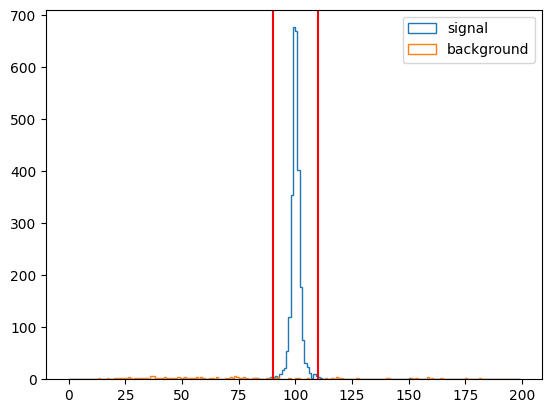

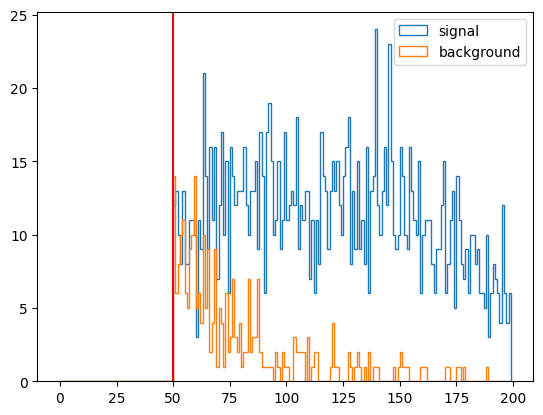

In [6]:
####################################################################################### two_a , 1_l , maa   sel
sgsl_2a = num_sl(sg_events,8,2)
sgsl_2a_1l = l_sl(sgsl_2a)
bgsl_2a = num_sl(bg_events,8,2)
bgsl_2a_1l = l_sl(bgsl_2a)

maa_sgsl_2a_1l=[]
pt_sgsl_2a_1l=[]
maa_bgsl_2a_1l=[]
pt_bgsl_2a_1l=[]

################################# pt sl


maa_sgsl_2a_1l_pt=[]
pt_sgsl_2a_1l_pt=[]
maa_bgsl_2a_1l_pt=[]
pt_bgsl_2a_1l_pt=[]


sgsl_2a_1l_pt = pt_sl(sgsl_2a_1l)
bgsl_2a_1l_pt = pt_sl(bgsl_2a_1l)
prlen(sgsl_2a_1l_pt)
prlen(bgsl_2a_1l_pt)

sgsl_2a_1l_pt_msl = m_aa(sgsl_2a_1l_pt,maa_sgsl_2a_1l_pt,pt_sgsl_2a_1l_pt)   
bgsl_2a_1l_pt_msl = m_aa(bgsl_2a_1l_pt,maa_bgsl_2a_1l_pt,pt_bgsl_2a_1l_pt)

prlen(sgsl_2a_1l_pt_msl)
prlen(bgsl_2a_1l_pt_msl)
################################## maa sl result
sgsl_2a_1l_msl = m_aa(sgsl_2a_1l,maa_sgsl_2a_1l,pt_sgsl_2a_1l)   ###msl   90<max<110
bgsl_2a_1l_msl = m_aa(bgsl_2a_1l,maa_bgsl_2a_1l,pt_bgsl_2a_1l) 

print('\033[0;34msg after 2aa sl :\033[0m',len(sgsl_2a))
print('\033[0;34msg after 2aa_1l sl :\033[0m',len(sgsl_2a_1l))
print('\033[0;34msg after 2aa_1l and 90<maa<110 sl :\033[0m',len(sgsl_2a_1l_msl))
print('')
print('\033[0;33mbg after 2aa sl :\033[0m',len(bgsl_2a))
print('\033[0;33mbg after 2aa_1l sl :\033[0m',len(bgsl_2a_1l))
print('\033[0;33mbg after 2aa_1l and 90<maa<110 sl :\033[0m',len(bgsl_2a_1l_msl))

##################################


plt.figure(1)
bins=np.arange(0,200,1) 
plt.hist(maa_sgsl_2a_1l_pt, bins=bins, label="signal", histtype='step')
plt.hist(maa_bgsl_2a_1l_pt, bins=bins, label="background", histtype='step')
plt.axvline(90, color='r')
plt.axvline(110, color='r')
plt.legend()
plt.show

plt.figure(2)
bins=np.arange(0,200,1) 
plt.hist(pt_sgsl_2a_1l_pt, bins=bins, label="signal", histtype='step')
plt.hist(pt_bgsl_2a_1l_pt, bins=bins, label="background", histtype='step')
plt.axvline(50, color='r')
plt.legend()
plt.show
#######################################from fig2 pt_cut>50

In [7]:
################################################################################################pt sl
sgsl_2a_1l_msl_pt = pt_sl(sgsl_2a_1l_msl)
bgsl_2a_1l_msl_pt = pt_sl(bgsl_2a_1l_msl)

prlen(sgsl_2a_1l_msl_pt)
prlen(bgsl_2a_1l_msl_pt)


2684
27


In [ ]:
sgsl_2a = num_sl(sg_events,8,2)
sgsl_2a_1e =  num_sl(sgsl_2a,0,1)
sgsl_2a_1u =  num_sl(sgsl_2a,4,1)

print('sg after 2aa sl :',len(sgsl_2a))
print('sg after 2aa_1e sl :',len(sgsl_2a_1e))
print('sg after 2aa_1u sl :',len(sgsl_2a_1u))
print('')

bgsl_2a = num_sl(bg_events,8,2)
bgsl_2a_1e =  num_sl(bgsl_2a,0,1)
bgsl_2a_1u =  num_sl(bgsl_2a,4,1)

print('bg after 2aa sl :',len(bgsl_2a))
print('bg after 2aa_1e sl :',len(bgsl_2a_1e))
print('bg after 2aa_1u sl :',len(bgsl_2a_1u))

#////////////////////////////////////////////////
ma=[]
mau=[]
bg_ma=[]
bg_mau=[]

pta=[]
ptau=[]
bg_pta=[]
bg_ptau=[]

mlv=[]
bg_mlv=[]

sg_ma_2a_1e=[]
bg_ma_2a_1e=[]
sg_ma_2a_1u=[]
bg_ma_2a_1u=[]

#////////////////////////////////////////////////
m_aa(sgsl_2a_1e, ma, pta)
m_aa(bgsl_2a_1e,bg_ma,bg_pta)

m_aa(sgsl_2a_1u, mau, ptau)
m_aa(bgsl_2a_1u,bg_mau,bg_ptau)


sg_sel_mlv = mlv_fuc(sel_ele,mlv)
bg_sel_mlv = mlv_fuc(bg_sel_ele,bg_mlv)
#////////////////////////////////////////////////
print('')
sel_m(ma,sg_ma_2a_1e,90,110)
sel_m(bg_ma,bg_ma_2a_1e,90,110)
print('sg_2aa_1e 90<maa<110 :',len(sg_ma_2a_1e))
print('bg_2aa_1e 90<maa<110 :',len(bg_ma_2a_1e))
print('')
sel_m(mau,sg_ma_2a_1u,90,110)
sel_m(bg_mau,bg_ma_2a_1u,90,110)
print('sg_2aa_1u 90<maa<110 :',len(sg_ma_2a_1u))
print('bg_2aa_1u 90<maa<110 :',len(bg_ma_2a_1u))
print('')
print('\033[31msg_2aa_1l 90<maa<110 :',len(sg_ma_2a_1e)+len(sg_ma_2a_1u))
print('\033[31mbg_2aa_1l 90<maa<110 :',len(bg_ma_2a_1e)+len(bg_ma_2a_1u))



    
bins=np.arange(0,200,1)
plt.hist(ma, bins=bins, histtype='step', color='black', label="sg" )
plt.hist(bg_ma, bins=bins, histtype='step', color='red', label="bg" )
plt.legend()
plt.show



In [ ]:
sgsl_2a_1e_pt=[]
sgsl_2a_1u_pt=[]

bgsl_2a_1e_pt=[]
bgsl_2a_1u_pt=[]

sgsl_2a_1l_pt=[]
bgsl_2a_1l_pt=[]

ptsl(sgsl_2a_1e,sgsl_2a_1e_pt)
ptsl(sgsl_2a_1u,sgsl_2a_1u_pt)

ptsl(bgsl_2a_1e,bgsl_2a_1e_pt)
ptsl(bgsl_2a_1u,bgsl_2a_1u_pt)

sgsl_2a_1l_pt=sgsl_2a_1e_pt+sgsl_2a_1u_pt
bgsl_2a_1l_pt=bgsl_2a_1e_pt+bgsl_2a_1u_pt

print(len(sgsl_2a_1l_pt))
print(len(bgsl_2a_1l_pt))





bins=np.arange(0,200,2)
plt.hist(pta, bins=bins, histtype='step', color='black')
plt.hist(bg_pta, bins=bins, histtype='step', color='red')
plt.show

In [ ]:
bins=np.arange(0,1000,8)
plt.hist(mlv, bins=bins, histtype='step', color='black')
plt.hist(bg_mlv, bins=bins, histtype='step', color='red')
plt.show

In [ ]:
    a1=[]
    b1=[]
    c1=[]
    d1=[]
for i in range(10):
    
     a = len(sg_events[np.where(sg_events[:,18]==i)])
     b = len(bg_events[np.where(bg_events[:,18]==i)])
     c = len(sel_photon[np.where(sel_photon[:,18]==i)])
     d = len(sel_ele[np.where(sel_ele[:,18]==i)])
     print(a)
     a1.append(a)
     b1.append(b)
     c1.append(c)
     d1.append(d)
print(a1)    

In [ ]:
plt.bar(range(len(b1)), b1, color='black', label='bg')
plt.bar(range(len(a1)), a1, color='salmon', label='sg')
plt.bar(range(len(c1)), c1, color='green', label='two_a sg')
plt.bar(range(len(d1)), d1, color='orange', label='one_e sg')
plt.legend(loc = 'upper right')
plt.show